# Importando base de dados 

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('data/tips.csv')
dados.head()


,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
dados.columns = ['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana','hora_dia','qtd_pessoas']
dados

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [6]:
#Tipo dos dados
type(dados)

pandas.core.frame.DataFrame

In [27]:
# Tamanho da base de dados
dados.shape

(244, 6)

In [10]:
dados.head(1)

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,No,Sun,Dinner,2


# Renomeando valores das colunas


In [14]:

s_n = {'No': 'Não', 'Yes':'Sim'}

dados.sobremesa = dados.sobremesa.map(s_n)

In [22]:
dados.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [20]:
dados.dia_semana.unique()

dia_semana = {'Sun':'Domingo', 'Sat':'Sabado', 'Thur':'Quinta', 'Fri':'Sexta'}

dados.dia_semana = dados.dia_semana.map(dia_semana)

In [21]:
dados.dia_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [24]:
dados.hora_dia.unique()

hora = {'Dinner':'Jantar', 'Lunch':'Almoço'}

dados.hora_dia = dados.hora_dia.map(hora)

In [25]:
dados.hora_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [26]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Verificando valores nulos

In [33]:
print(f'Total de linhas no nosso dataset: {dados.shape[0]}, e colunas: {dados.shape[1]}')

Total de linhas no nosso dataset: 244, e colunas: 6


In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   valor_conta  244 non-null    float64
 1   gorjeta      244 non-null    float64
 2   sobremesa    244 non-null    object 
 3   dia_semana   244 non-null    object 
 4   hora_dia     244 non-null    object 
 5   qtd_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [36]:
dados.isnull().sum()

valor_conta    0
gorjeta        0
sobremesa      0
dia_semana     0
hora_dia       0
qtd_pessoas    0
dtype: int64

# Importando Seaborn

In [28]:
import seaborn as sns

## Análise 1: Valor da Conta x Gorjeta

In [29]:
dados.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'hora_dia',
       'qtd_pessoas'],
      dtype='object')

<Axes: xlabel='valor_conta', ylabel='gorjeta'>

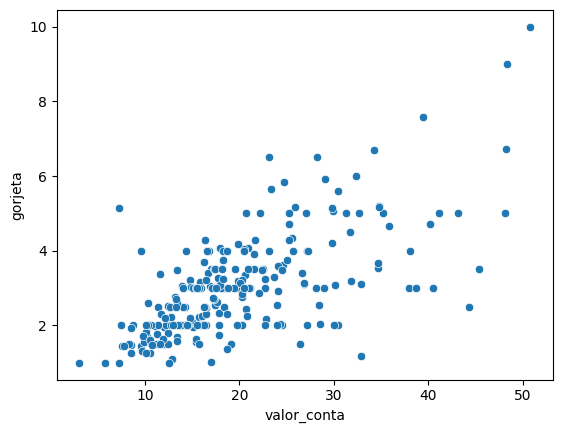

In [31]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', data=dados)

valor_gorjeta

#### Visualmente, o valor da gorjeta aumenta conforme o valor da conta

## Criando o campo porcentagem

In [37]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [41]:
dados['porcentagem'] = (dados.gorjeta / dados.valor_conta)*100

dados

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Jantar,3,20.392697
240,27.18,2.00,Sim,Sabado,Jantar,2,7.358352
241,22.67,2.00,Sim,Sabado,Jantar,2,8.822232
242,17.82,1.75,Não,Sabado,Jantar,2,9.820426


In [39]:
dados.porcentagem = dados.porcentagem.round(2)

In [40]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
